In [1]:
import dcraw
import dcraw_utils
import colour
import color_correction
import sys
import image_utils
from color_correction import CreateSpyderCheck

colour.plotting.colour_style()

colour.utilities.describe_environment()

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.9.7 (default, Sep 16 2021, 13:09:58)                       *
*                [GCC 7.5.0]                                                  *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.3.16                                                       *
*       colour-demosaicing : 0.1.6                                            *
*       colour-checker-detection : 0.1.2                                      *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.9.0                                                       *
*       matplotlib : 3.4.3              

defaultdict(collections.OrderedDict,
            {'Interpreter': OrderedDict([('python',
                           '3.9.7 (default, Sep 16 2021, 13:09:58) \n[GCC 7.5.0]')]),
             'colour-science.org': OrderedDict([('colour', '0.3.16'),
                          ('colour-demosaicing', '0.1.6'),
                          ('colour-checker-detection', '0.1.2')]),
             'Runtime': OrderedDict([('imageio', '2.9.0'),
                          ('matplotlib', '3.4.3'),
                          ('networkx', '2.6.3'),
                          ('numpy', '1.20.3'),
                          ('pandas', '1.3.4'),
                          ('scipy', '1.7.1'),
                          ('six', '1.16.0'),
                          ('opencv', '4.5.4-dev')])})

In [2]:
path = sys.path[0] + "/"
infn = "DSCF5420.RAF"
outfn = path + infn.split(".", 1)[0]
suffix = ".RAF"
verbose = True

In [3]:
rawData = dcraw.imread(infn, path = path, verbose = verbose)

image_srgb = dcraw.postprocessing(rawData, output_srgb = True, verbose = verbose)

image_bright = dcraw_utils.auto_bright(image_srgb, perc=0.01, verbose=verbose)

# image_utils.save_image_16(outfn + "_srgb.tiff", image_srgb, verbose = verbose)

/home/rong/script/dcraw_py/images/DSCF1366.RAF
/home/rong/script/dcraw_py/images/DSCF5219.RAF
/home/rong/script/dcraw_py/images/DSCF3396.RAF
/home/rong/script/dcraw_py/images/DSCF5420.RAF
/home/rong/script/dcraw_py/images/DSCF5454.RAF
/home/rong/script/dcraw_py/images/DSCF1371.RAF
Find 6 [.RAF] files under [/home/rong/script/dcraw_py/].

Import [/home/rong/script/dcraw_py/images/DSCF5420.RAF]

Start white balance correction with camera setting.
WB coefficient is [ 0.98880597  0.56343284  1.          0.56343284]
Scale coefficient is [ 0.99266849  0.56562508  1.00390625  0.56563375]
White balance finished.

Start demosaicing.
Demosacing using [<function demosaicing_CFA_Bayer_bilinear at 0x7f758d5f5f70>]...
Demosacing finished.

Start camera rgb to srgb conversion...
Conversion done.


Start auto bright...
Brighten ratio: 16.29008202833706
Auto bright finished.


In [4]:
image_lrgb = colour.cctf_decoding(image_bright / 65535)
image_lrgb[image_lrgb>1] = 1

# image_lrgb = colour.cctf_decoding(colour.io.read_image("cctest_images/DSCF5420.jpg"))

colour.plotting.plot_image(colour.cctf_encoding(image_lrgb))

(<Figure size 1280x720 with 1 Axes>, <AxesSubplot:>)

In [5]:

swatch = color_correction.getColorCorrectionSwatches(image_lrgb, verbose = verbose)

/home/rong/anaconda3/lib/python3.9/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: Colour checker was seemingly flipped, reversing the samples!
  warn(*args, **kwargs)


Found 1 swatches.


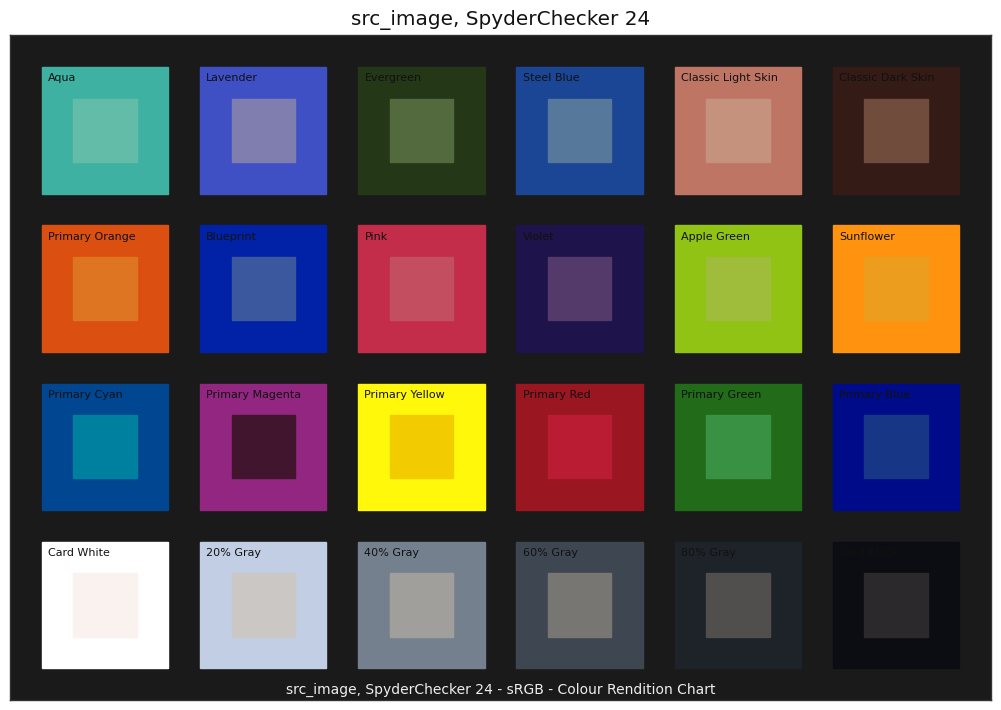

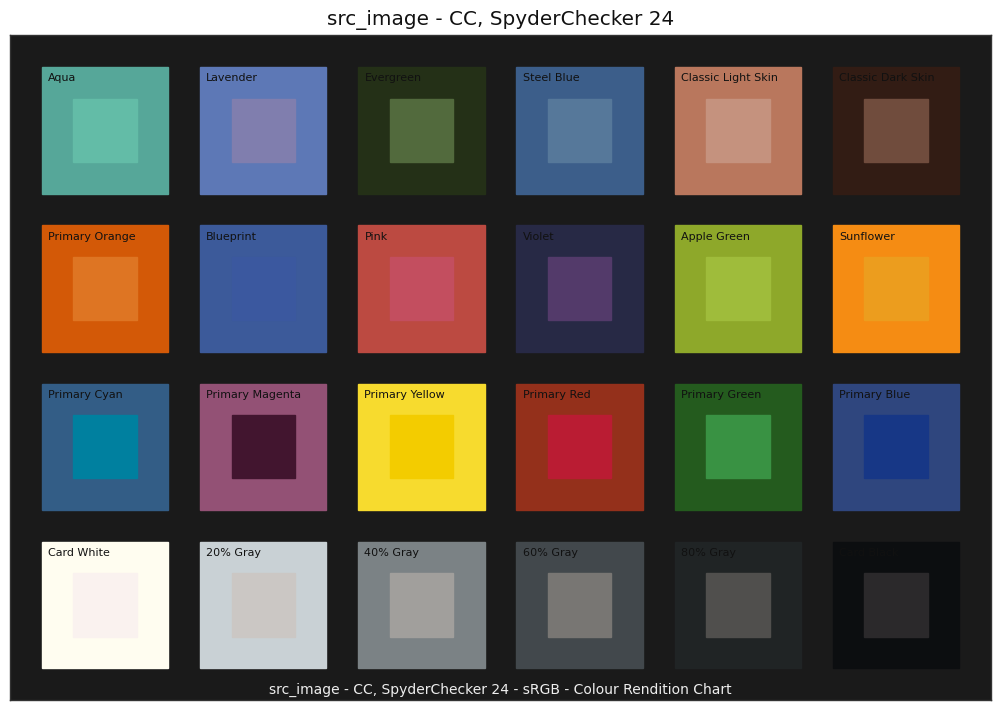

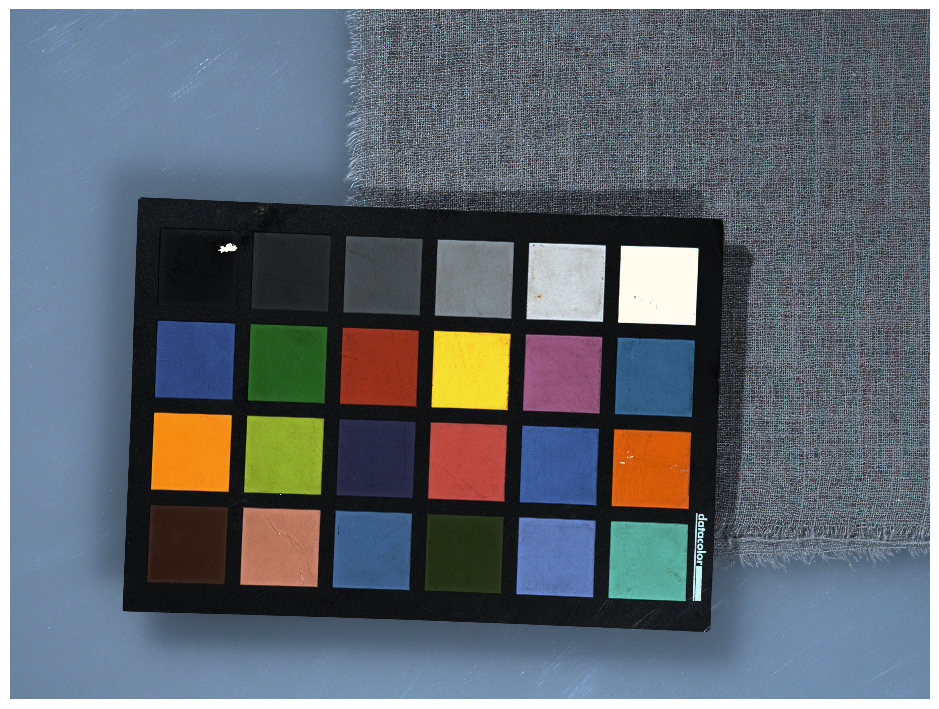

In [6]:
image_corrected = color_correction.correction(image_lrgb, swatch, verbose = verbose)